In [35]:
import pandas as pd
# python 환경 : pip install google-api-python-client
# anaconda환경 : conda install -c conda-forge google-api-python-client
from googleapiclient.discovery import build

# 유트브 APi : https://developers.google.com/youtube/v3/getting-started?hl=ko

# 예시 유트브 링크 : https://www.youtube.com/watch?v=tZolEtoQyuY
# 자신 API KEY 사용
text_file = open('./API_KEY.txt', 'r')
api_key = text_file.readline()
# 비디오 아이디 : tZolEtoQyuY
video_id = 'tZolEtoQyuY'

# 댓글을 담을 변수
comments = list()
# youtebe, v3 api 사용 developerKey는 발급받은 키 하루 10000건 조회가능
api_obj = build('youtube', 'v3', developerKey=api_key)

# response = api_obj.videoCategories().list(part='snippet,id', regionCode='kr').execute()

# https://www.youtube.com/watch?part='snippet,replies'&vieoid='asdasd'&maxResults=100이와 같이 요청을 함 snippet필수속성, replies댓글
response = api_obj.videos().list(part='snippet,id', chart='mostPopular', regionCode='kr', maxResults=10).execute()

In [36]:
# video_id_list = ['cX4EOv-_AGs', '8JbpWTljkdk', 'fk8vvmHIWAA']

In [37]:
video_id_list = list()
comments = list()
for i in range(10):
    video_id_list.append(response['items'][i]['id'])
    
video_id_list

['ZfK9ER8Xh7w',
 'SxHmoifp0oQ',
 'jI8fYUcqVO8',
 'Mr2qYqFQn3Q',
 'fYzLPJXQ6uM',
 '-akkr0oS_Iw',
 '-LU0PzCDYGo',
 'Lfu2XXeT59Y',
 'npcaOTuL8JE',
 'gvuj-hMpFh8']

In [38]:


for video_id in video_id_list:
    response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, maxResults=100).execute()
    while response:
        
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append([comment['textOriginal'], comment['authorDisplayName'], comment['publishedAt'], comment['updatedAt'], comment['likeCount'], video_id])
            if item['snippet']['totalReplyCount'] > 0:
                for reply_item in item['replies']['comments']:
                    reply = reply_item['snippet']
                    comments.append([reply['textOriginal'], reply['authorDisplayName'], reply['publishedAt'], reply['updatedAt'], reply['likeCount'], video_id])
        if 'nextPageToken' in response:
            response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=10000).execute()
        else:
            break


In [39]:
columns = ['comment', 'author', 'create_at', 'update_at', 'like_count', 'video_id']
comments_df = pd.DataFrame(comments, columns=columns)

In [42]:
comments_df.to_csv('comments_update_df.csv', index=False)

In [40]:
comments_df

,comment,author,create_at,update_at,like_count,video_id
0,다내보냈나 재후니가 \n짐다갔나,현팬더,2023-02-15T07:53:35Z,2023-02-15T07:53:35Z,0,ZfK9ER8Xh7w
1,청소용역업체 1주일에 한번씩 부를 거 같네,wx2242p,2023-02-15T07:52:09Z,2023-02-15T07:52:09Z,0,ZfK9ER8Xh7w
2,망했다 망했어 ㅋㅋㅋㅋㅋ,박삐삐,2023-02-15T07:52:05Z,2023-02-15T07:52:05Z,0,ZfK9ER8Xh7w
3,더럽고 개돼지같은 사람보단 차라리 결벽증있는 성장훈이 낫다 최소한 사람이앉을순 있잖아,밤하늘,2023-02-15T07:51:59Z,2023-02-15T07:51:59Z,1,ZfK9ER8Xh7w
4,못 앉게하지 ㅋㅋ,겜 돌이,2023-02-15T07:52:55Z,2023-02-15T07:52:55Z,1,ZfK9ER8Xh7w
...,...,...,...,...,...,...
59426,바람이 붑니다,ㅈㄹㅁ,2023-02-14T08:24:36Z,2023-02-14T08:24:36Z,1,gvuj-hMpFh8
59427,태풍오면 고등어 양식뿐만 아니라 모든 업종이 피해를 볼텐데.... 하다못해 편의점도...,성현,2023-02-14T06:29:40Z,2023-02-14T06:29:40Z,2,gvuj-hMpFh8
59428,바람불죠,한년만본다,2023-02-14T06:20:29Z,2023-02-14T06:20:29Z,1,gvuj-hMpFh8
59429,강제 방생,김선생,2023-02-14T06:20:23Z,2023-02-14T06:20:23Z,1,gvuj-hMpFh8


In [43]:
comments_df.video_id.value_counts()

npcaOTuL8JE    17305
fYzLPJXQ6uM    15410
jI8fYUcqVO8    11163
SxHmoifp0oQ     9724
Mr2qYqFQn3Q     1899
Lfu2XXeT59Y     1698
ZfK9ER8Xh7w      928
-LU0PzCDYGo      737
-akkr0oS_Iw      410
gvuj-hMpFh8      157
Name: video_id, dtype: int64

In [44]:
comments_df['comment'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
59426    False
59427    False
59428    False
59429    False
59430    False
Name: comment, Length: 59431, dtype: bool

In [45]:
comments_df.describe()

,like_count
count,59431.000000
mean,4.548788
std,76.754646
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8618.000000


In [46]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59431 entries, 0 to 59430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     59431 non-null  object
 1   author      59431 non-null  object
 2   create_at   59431 non-null  object
 3   update_at   59431 non-null  object
 4   like_count  59431 non-null  int64 
 5   video_id    59431 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [20]:
comments_df.sort_values(by='like_count', ascending=False)

,comment,author,create_at,update_at,like_count
60558,연진아.. 계정공유 금지시킨대.. 못 볼것 같아..,감자싫어하는강원도민,2023-02-09T00:00:53Z,2023-02-09T00:00:53Z,34639
60167,드라마 파급효과가 어마어마하더라구요. 새삼스럽게 미디어 영향력 느낍니다. 파트2가 ...,복덩이,2023-02-09T01:50:33Z,2023-02-09T01:50:33Z,13804
20957,Who will always support Jennie raise their han...,AUGUSTIFY,2023-02-14T09:00:42Z,2023-02-14T09:00:42Z,8310
57726,Aquí quienes apoyan a Suga para siempre 💜👇🏻,Kimbeolly_KimiGo,2023-02-09T12:03:02Z,2023-02-09T12:03:02Z,7787
60450,사실상 파트1은 빌드업 파트였는데도 그정도 재미였는데 이제 직접적이고 물리적인 응징...,무념무상,2023-02-09T00:42:47Z,2023-02-09T00:43:23Z,7626
...,...,...,...,...,...
26817,"지수안장 이 댓글 보면 터키에 대지진이 있었다. 도와주세요, 불행히도 우리는 텐트에...",Sooyaxwq_,2023-02-14T09:52:25Z,2023-02-14T09:52:25Z,0
26820,woww,VLAD,2023-02-14T09:51:32Z,2023-02-14T09:51:32Z,0
26821,We love you jisoo 💞💞💞💞💞💞💞💞💞💞💞💞💞💞💞💞💞💞😘💞💞💞💞,Hương Huỳnh,2023-02-14T09:51:09Z,2023-02-14T09:51:09Z,0
26822,Love you 💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖,Hương Huỳnh,2023-02-14T09:50:55Z,2023-02-14T09:50:55Z,0


In [31]:
new_df = comments_df.loc[len(comments_df)/2:, :]
new_df

,comment,author,create_at,update_at,like_count
31075,I love u so much baby,lakrandhi pathirana,2023-02-13T17:23:48Z,2023-02-13T17:23:48Z,0
31076,❤️❤️❤️🇰🇷🇦🇷,Gustavo Lizarralde,2023-02-13T17:23:47Z,2023-02-13T17:23:47Z,0
31077,مليكه جيسو 💟,ايناس الياس,2023-02-13T17:23:42Z,2023-02-13T17:23:42Z,0
31078,😻,عـالـم حقٌيُر 🕷,2023-02-13T17:23:32Z,2023-02-13T17:23:32Z,0
31079,Happy Valentines Day my queen jisoo!!!,for-V방탄소년단-,2023-02-13T17:23:31Z,2023-02-13T17:23:31Z,0
...,...,...,...,...,...
62144,1등,hae young joung,2023-02-10T09:01:24Z,2023-02-10T09:01:24Z,0
62145,1,공백,2023-02-10T09:00:53Z,2023-02-10T09:00:53Z,1
62146,와~,양갱,2023-02-10T09:00:53Z,2023-02-10T09:00:53Z,0
62147,1빠,큐트,2023-02-10T09:00:41Z,2023-02-10T09:00:41Z,0


In [40]:
comments_df.to_csv('./comments_df.csv')

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


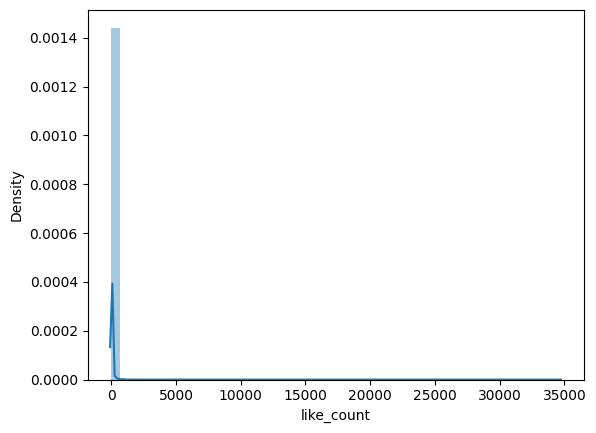

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(new_df['like_count'])

plt.show()



In [41]:
import json

# response['items'] 변수
items = response['items']

# 저장할 파일 경로
file_path = './items.json'

# json 파일로 내보내기
with open(file_path, 'w') as json_file:
    json.dump(items, json_file)